---
title: "Annex: Heavy computations"
author: 
    - name: "Wolfram Barfuss"
    - affiliation: "University of Bonn"
---

In [1]:
# Imports for the nbdev development environment
import nbdev

In [2]:
import numpy as np
import matplotlib.pyplot as plt

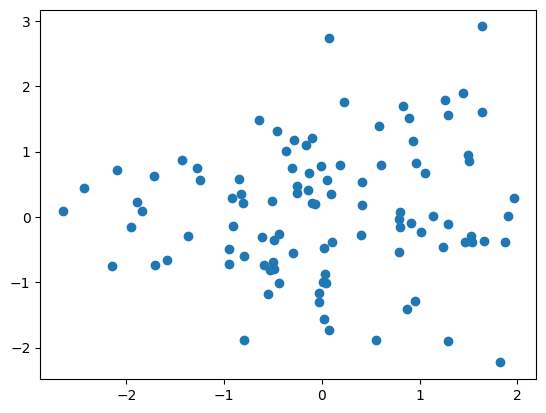

In [3]:
#| label: fig-scatter-plot
#| caption: "A scatter plot from a heavy and complicated data analysis."
data = np.random.randn(2, 100)
plt.scatter(*data);

In [4]:
 #| default_exp HeavyComputations

In [5]:
 #| export
import numpy as np

In [6]:
 #| export
def noisy_predprey_model(prey_birth_rate, 
                         prey_mortality, 
                         predator_efficiency, 
                         predator_death_rate,
                         initial_prey, 
                         initial_predators,
                         time_length,
                         noiselevel):
    """ Discrete-time predator-prey model. """
    x = -1 * np.ones(time_length)
    y = -1 * np.ones(time_length)
    x[0] = initial_prey
    y[0] = initial_predators
    for t in range(1, time_length):
        x[t] = x[t-1] + prey_birth_rate * x[t-1]\
            - prey_mortality * y[t-1]*x[t-1]
        y[t] = y[t-1] + predator_efficiency * y[t-1]*x[t-1]\
            - predator_death_rate * y[t-1]\
            + noiselevel * (0.5 - np.random.rand())
    return x, y

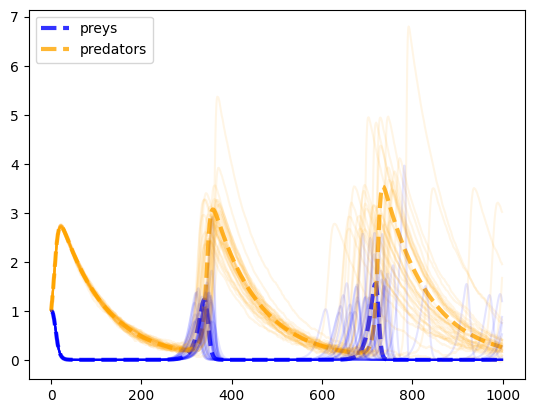

In [7]:
np.random.seed(42)

preys, predators = noisy_predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000, 0.0)
plt.plot(preys, lw=3, ls='--', label="preys", color='blue', alpha=0.8) 
plt.plot(predators, lw=3, ls='--', label="predators", color='orange', alpha=0.8)

for _ in range(35):
    preys, predators = noisy_predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000, 
                                            0.025)
    
    plt.plot(preys, color='blue', alpha=0.1) 
    plt.plot(predators, color='orange', alpha=0.1)
plt.legend(); 

In [8]:
nbdev.export.nb_export("HeavyComputations.ipynb", "_code")